![sslogo](https://github.com/stratascratch/stratascratch.github.io/raw/master/assets/sslogo.jpg)

# An Introduction to Pandas

*Attribution: By Jonas Eschle and Rafael Silva Coutinho, based on [this tutorial](https://colab.research.google.com/drive/1a4sbKG7jOJGn4oeonQPA8XjJm7OYgcdX)*

This notebook introduces the pandas library and, in a way, provides convenient shortcuts for the usage of numpy arrays or matplotlib (but is based around those).

## Basic Pandas Concepts

Some very basic Pandas and python concepts to get started

#### Import the pandas package

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

#### Create a simple DataFrame

- syntax: pd.DataFrame({column1 : value1, column2 : value2, column3 : value3})

You can have anything as column names and anything as values.

The only requirement is to have all value lists being of equal length (all are of length 3 in this example)

There are many ways to create a data frame and you will see some more during the tutorial. All of them can be seen documented [here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html).

In [12]:
df = pd.DataFrame({'name':['Bob','Jen','Tim'],
                   'age':[20,30,40],
                   'pet':['cat', 'dog', 'bird']},
                 index=[5, 6, 8])  # default index is 0, 1, 2,..., usually not needed

print(df)

  name  age   pet
5  Bob   20   cat
6  Jen   30   dog
8  Tim   40  bird


#### View the column names and index values

The index is one of the most important concepts in pandas.

Each dataframe has only a single index which is always available as `df.index` and if you do not supply one (as we did not for this dataframe) a new one is made automatically.

Indexes define how to access rows of the dataframe.

The simplest index is the range index but there are more complex ones like interval index, datetime index and multi index.

We will explore indexes more in depth during the course of this lecture.

In [4]:
print(df.columns)
print(df.index)

Index(['name', 'age', 'pet'], dtype='object')
RangeIndex(start=0, stop=3, step=1)


#### Select a column by name in 2 different ways

These two ways are equivalent and can be used interchangeably almost always.

The primary exception is when the name of the column contains spaces. If for example we had a column called "weekly sales" we have to use df['weekly sales'] because `df.weekly sales` is a syntactic error.

In [5]:
print(df['name'])
print(df.name)

0    Bob
1    Jen
2    Tim
Name: name, dtype: object
0    Bob
1    Jen
2    Tim
Name: name, dtype: object


#### Select multiple columns

To select multiple columns we use `df[columns_to_select]` where `columns_to_select` are the columns we are interested in given as a simple python list. As the result we will get another data frame.

This is the equivalent of listing columns names in `SELECT` part of a sql query.

In [6]:
df[['name','pet']]

,name,pet
0,Bob,cat
1,Jen,dog
2,Tim,bird


#### Select a row by index

Regular selection of rows goes via its index. In this case, the index is similar to the indexing in Numpy. When using range indices we can access rows using integer indices but this will not work when using datetime index for example.

We can always access any row in the dataframe using `.iloc[i]` for some integer i.

The result is a series object from which we can access values by using column indexing.

In [7]:
df.iloc[0]

name    Bob
age      20
pet     cat
Name: 0, dtype: object

### Sort Function

- pandas.pydata.org
- https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html

#### Sort the data by pet

There are two ways to sort.
- By index
- By value

By value means sorting according to value in a column.

In this example we sort the rows of the dataframe based on values in 'pet' column.

The parameter `ascending = True` means that we want the rows sorted in ascending order. To get descending order use `ascending = False`.

`inplace=True` changes the dataframe in place, it's modified, which means that **no copies** (for large dataframes, 100'000+ and many operations, this _may_ becomes a bottleneck, but usually, this is not a concern!) are made and your previous data stored in the dataframe is **lost**. By default inplace is always False. When it is false a copy is made of your data and that copy is sorted and returned as output.

In [13]:
dfsorted = df.sort_values('pet', ascending=True)

### Indexing with DataFrames

Everything we discussed about indexing in numpy arrays applies to dataframes as well.

DataFrames are very similar to 2d-arrays with the main exception being that in DataFrames you can index using strings (column names).

#### View the index after the sort

In [14]:
print(dfsorted)

  name  age   pet
8  Tim   40  bird
5  Bob   20   cat
6  Jen   30   dog


#### Difference between loc and iloc

- `.loc` selection is based on the value of the index. For example if the index was categorical we could index via some category.
- `.iloc` selection is **always** based on integer positions. When using iloc we are treating the dataframe as 2d-array with no special structure compared to the case of `.loc`

In [18]:
df.loc[5] #index based (remember? we used [5, 6, 7] as the (arbitrary) indices for the dataframe

name    Bob
age      20
pet     cat
Name: 5, dtype: object

In [19]:
df.iloc[0] #relative position based indexing

name    Bob
age      20
pet     cat
Name: 5, dtype: object

#### Use iloc to select all rows of a column

This will select all rows of the second column.

Remember `:` = `::1`

First index is always row and second is always column when dealing with dataframes.

In [20]:
df.iloc[:,2]

5     cat
6     dog
8    bird
Name: pet, dtype: object

#### Use iloc to select the last row

In [21]:
df.iloc[-1,:]

name     Tim
age       40
pet     bird
Name: 8, dtype: object

## Basic Pandas Concept Exercises

In [44]:
sales = [100,130,119,92,35]
cost = [77, 45, 87, 69, 102]
customer_account = ['B100','J101','X102','P103','R104']
city = ['BOS','LA','NYC','SF','CHI']

#### Create a DataFrame with the data above


#### What is the name of the first column?

#### Sort the DataFrame by city in descending order (check the documentation for sort)

#### Which customer is in the last row of the DataFrame?

#### Reorder the columns with customer in the first column

**Solution**

In [45]:
df = pd.DataFrame({'sales': sales, 'customer_account': customer_account, 'city': city, 'cost': cost})

In [46]:
df.columns[0]

'sales'

In [47]:
dfsorted = df.sort_values(by='city', ascending=False)
print(dfsorted)

   sales customer_account city  cost
3     92             P103   SF    69
2    119             X102  NYC    87
1    130             J101   LA    45
4     35             R104  CHI   102
0    100             B100  BOS    77


In [48]:
lastdf = df.iloc[-1]
print(lastdf)
print(f"Last customer account: {lastdf['customer_account']}")

sales                 35
customer_account    R104
city                 CHI
cost                 102
Name: 4, dtype: object
Last customer account: R104


In [49]:
dfreorder = df[['customer_account', 'city', 'sales', 'cost']]
print(dfreorder)

  customer_account city  sales  cost
0             B100  BOS    100    77
1             J101   LA    130    45
2             X102  NYC    119    87
3             P103   SF     92    69
4             R104  CHI     35   102


## Visualization

Before we work with the data, we'll cover a few useful methods for visualization, `plot` and `hist`. Both are a thin wrapper anround matplotlibs functions and simply provide a shortcut.

They have the same API (Application Programming Interface, _i.e._ the name of the arguments, what they do etc.) but allow, instead of passing the array to plot, just the string of the column for plotting.

<Axes: xlabel='cost'>

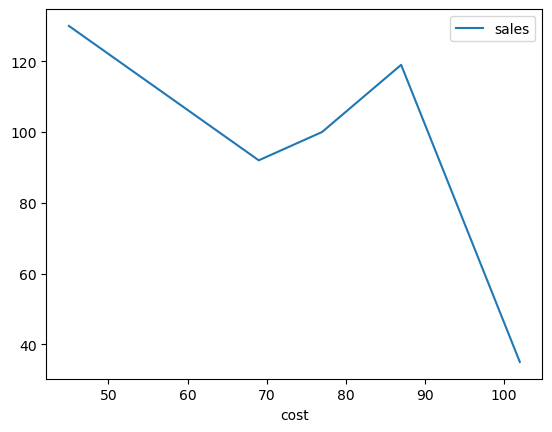

In [52]:
# first sort by cost, then plot
plt.figure()
df.sort_values(by='cost', ascending=True).plot('cost', 'sales')  # and any other arguments that plot takes

array([[<Axes: title={'center': 'cost'}>]], dtype=object)

<Figure size 640x480 with 0 Axes>

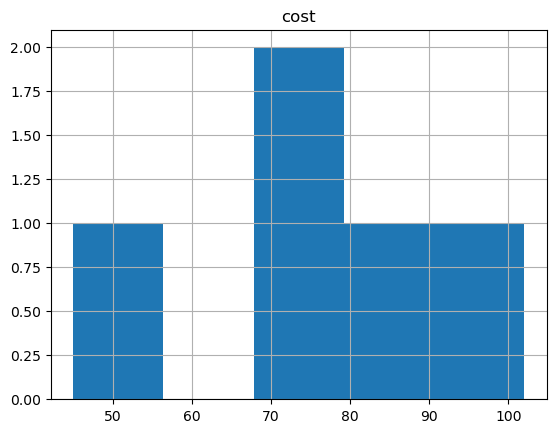

In [56]:
plt.figure()
df.hist('cost', bins=5)  # and any other argument that plt.hist takes

## Basic Pandas Functionality

Let's take a look at what Pandas can do.



In [42]:
TODO: get titanic dataset

AttributeError: module 'pandas.util' has no attribute '_testing'

#### Investigate the first few rows of data

The `head` method by default prints the first 5 rows of your dataframe.

If you pass it a parameter `n` it will print first `n` rows.

The docs are [here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.head.html)

In [ ]:
data.head()

#### Investigate the last 10 rows of data

tail is similar to head except it prints the last `n` rows.

In [ ]:
data.tail(10)

#### Investigate the data types in the DataFrame

This method will tell you the types of columns.

Types are automatically inferred by pandas and usually you do not have to worry about them.

[docs](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.info.html)

In [ ]:
data.info()

#### Get some summary statistics

To learn more about describe visit [this link](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html)

In [ ]:
data.describe().T

### Filtering Dataframes

You can filter data based on the columns and values in the dataframe

#### Filter the data for men

There are two pieces of the puzzle here:
- `data.sex=='male'` will give a boolean array where True means that row has a column called sex which has value 'male'. This numpy array is called the predicate.
- data[data.sex=='male'] will give back all rows for which the predicate holds true.

The result of this filter is a dataframe with same columns as the input dataframe.

In [ ]:
data[data.sex=='male']

#### Filter the ages for the men

Again there are two important parts:
- `data.sex=='male'` is the predicate as before
- `data.age` means taking the values for the age column, and `data.age[data.sex=='male']` means taking all ages which are related to male rows.

The result of this is pandas series **not** a dataframe.

In [ ]:
data.age[data.sex=='male']

### Adding methods to filters

A method is a function and is used frequently when analyzing data in Pandas. There are countless Pandas methods. We'll go over a few of the basic ones to show how you can use methods to quickly analyze your data.

#### How many men and women were on the Titanic?

The pipeline always goes the same way
- Predicate is evalatued
- Data is filtered according to a predicate
- An aggregate value is computed after the filtering.

The count method simply counts the number of frames in the dataframe.

In [ ]:
data.sex[data.sex=='male'].count()


In [ ]:
data.sex[data.sex=='female'].count()

#### What was the survival rate for adult men (age>=18)

Here we combine predicates using the and operator (&).

This operator applies the logical and operation between elements at matching positions.

For example:
- x = np.array([True, False, True, True])
- y = np.array([False, True, False, True])
- will give x & y = np.array([True & False, False & True, True & False, True & True]).

In the following example we use the or combiner (|).

You can combine any two boolean numpy arrays as long as they have the same shape using the & and | operators.

Combining regular python lists this way does not work.

In [ ]:
data.survived[(data.sex=='male')&(data.age>=18)].mean()

#### What was the survival rate for women and children?

In [ ]:
data.survived[(data.sex=='female')|(data.age<18)].mean()

#### Use groupby to compare the survival rates of men and women

The `groupby` method is one of the most important tools you will use in your day to day work.

It's main input parameter is either a string denoting a column name or a list of strings denoting a list of column names.

It's output is a GroupBy object which is very similar to a dataframe.

For more info see the [docs](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html).

In [ ]:
data.groupby('sex')['survived'].mean()

#### Create a DataFrame with groupby

In [ ]:
new = data.groupby(['sex','pclass'])['survived','age'].mean()
new

## Importing and Exporting Data with Pandas

#### Pandas has easy to use functions for importing and exporting different data types:
- CSV Files
- Excel Worksheets
- Queries from Databases

## More Basic Pandas Exercises

#### What was the average age of the survivors?

#### What was the combined survival rate of both children (age less than 18) and seniors (age greater than 60)?

#### Group by pClass and investigate average survival rate, age and fare

#### Create a CSV with the names and ages of the surivors and another CSV file with the names and ages of the deceased. Please refer to documention (to_csv method) to complete the exercise.

[Documentation for the method](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_csv.html)